In [1]:
import time      # for testing use only
import os         # for testing use only

import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests
from selenium import webdriver
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import json




C:\Users\shahar\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\shahar\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=T

Rawg website uses script to move between pages without pressing any button,
the site works that when you scroll down you reach a new page.
We had to find a way to scroll in the site so we used selenium to open the pages and then scroll method to scroll down the site in the crawling
The scroll method have a timeout to let the page fully load and we added counter no to reach the bottom of the page where the games were less relevannt with less data

In [130]:
##code from:https://stackoverflow.com/questions/62835369/driver-execute-scriptwindow-scrollby0-document-body-scrollheight-does-not
def scroll(driver, timeout):
    scroll_pause_time = timeout

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")
    counter = 0
    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(scroll_pause_time)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height or counter == 150:
            # If heights are the same it will exit the function 
            break
        last_height = new_height
        counter = counter + 1

At first we did crwaling to get all the geners of the games in the Rawg website 

In [137]:
url = "https://rawg.io/genres"
path = "C:\\Users\shahar\Desktop\chromedriver.exe"
browser = webdriver.Chrome(path)
browser.get(url)
html = browser.page_source
soup = BeautifulSoup(html,'html.parser')
mtag = soup.findAll("div", attrs= {"class" : "heading heading_4 heading_centred"})
links = []
for row in mtag:
    col = row.find('a')
    links.append("https://rawg.io" + col["href"])


browser.close()


<ipython-input-137-9f661bac718d>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


<font size="4">
In this cell we used selenium to get the name of the game, we used the genre links that we did in our previous cell and from each genre we got the games</font>



In [139]:
path = "C:\\Users\shahar\Desktop\chromedriver.exe"
browser = webdriver.Chrome(path)
linkstogames = []
for link in links:
    browser.get(link)
    scroll(browser,2)
    html = browser.page_source
    soup2 = BeautifulSoup(html,'html.parser')
    mtag2 = soup2.findAll("a", attrs= {"class" : "game-card-medium__info__name"})
    for col in mtag2:
        linkstogames.append("https://rawg.io" + col["href"])

<ipython-input-139-22e500f5f934>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


<font size="5">This is our main crawling section</font>



In this crawling we got into each game link from ealier and we crawled our data we needed,
<br>We took the data from 14000 diffrent games <br>
1. Name of the game
2. Release Data
3. Avrage Play Time
4. Publisher
5. Devloper Company
6. Genres
7. Ratings Of The Game
8. Age Rating
9. Platform Names
10. Where To Buy The Game


To each data we used the correct Html code that we found in the website to be able to crawl the exact data we needed.
<br> Some of the data had the same name so we used a counter to mark the correct location of the data

In [146]:
names = []
rating = []
howManyPlatforms = []
Genre = []
Devolper = []
AgeRating = []
AgeRaing = []
HowManyPlacesToBuy = []
ReleaseDate = []
Publisher = []
WhereToBuy = []
avrage =[] 
browser = webdriver.Chrome(path)
for game in linkstogames:
    browser.get(game)
    html = browser.page_source
    soup3 = BeautifulSoup(html,'html.parser')
    if soup3.find("h1", attrs= {"class" : "heading heading_1 game__title"}):
        name = soup3.find("h1", attrs= {"class" : "heading heading_1 game__title"})
        names.append(name.text)
    else:
        names.append(None)
    if soup3.findAll("div", attrs= {"class" : "game__meta-playtime"}):
        avg = soup3.find("div", attrs= {"class" : "game__meta-playtime"})
        avrage.append(avg.text.split(":")[1])
    else: avrage.append(None)
    WheretoBuy = soup3.findAll("div", attrs= {"class" : "game__availability-item"})
    size = 0
    for i in WheretoBuy:
        size+=1
    WhereToBuy.append(size)
    Counter = 0
    gameblock = soup3.findAll("div", attrs= {"class" : "game__meta-block"})
    for block in gameblock:
        title = block.findAll("div", attrs={"class" : "game__meta-title"})
        data = block.find("div", attrs={"class" : "game__meta-text"})
        for tit in title:     
            if Counter==0:    
                if(tit.text == "Platforms"):
                    howManyPlatforms.append((data.text.split(",")))
                else:
                    howManyPlatforms.append(None)
                    
            if Counter==1:
                
                if (tit.text == "Metascore"):
                    rating.append(data.text)
                else:
                    rating.append(None)
                    
            if Counter==2:
                if(tit.text == "Genre"):
                    Genre.append((data.text.split(",")))
                else:
                    Genre.append(None)
                
            if Counter==3:
                    
                if(tit.text == "Release date"):
                    ReleaseDate.append(data.text)
                else:
                    ReleaseDate.append(None)
                
            if Counter==4:
                if(tit.text == "Developer"):
                    Devolper.append(data.text)
                else:
                    Devolper.append(None)
                
            if Counter==5:
                    
                if(tit.text == "Publisher"):
                    Publisher.append(data.text)
                else:
                    Publisher.append(None)
                
            if Counter==6:
                if(tit.text == "Age rating"):
                    AgeRating.append(data.text)
                else:
                    AgeRating.append(None)
            if(Counter > 6):
                break;
            Counter = Counter + 1
browser.close()    

<ipython-input-146-699b534d8130>:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


Creating the DataFrame from the lists of our data that we got from the crawling earlier, then we saved the dataframe as an a csv file

In [369]:
df = pd.DataFrame({"Name":names,"Number Of Genres": Genre, "Number Of Platforms":howManyPlatforms,
                   "Rating":rating,"Devoloper":Devolper,"WhereToBuy":WhereToBuy,"Publisher":Publisher,"ReleaseDate":ReleaseDate,"Average Play Time":avrage})
df
df.to_csv("GameDB.csv")


0        [Linux,  macOS,  PC,  Android,  iOS]
1        [PC,  PlayStation 4,  PlayStation 5]
2                                        [PC]
3                        [macOS,  PC,  Linux]
4              [PlayStation 4,  PS Vita,  PC]
                         ...                 
13575            [Android,  iOS,  macOS,  PC]
13576              [iOS,  PC,  macOS,  Linux]
13577    [iOS,  PC,  macOS,  Linux,  Android]
13578              [macOS,  iOS,  PC,  Linux]
13579                            [macOS,  PC]
Name: Number Of Platforms, Length: 13580, dtype: object

Feading the DataFrame that we saved from earlier and saving it

In [2]:
df = pd.read_csv(r'C:\Users\shahar\Desktop\GameDB.csv',index_col=0) 
df


,Name,Number Of Genres,Number Of Platforms,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time
0,sacred-gold,NaN,"['Linux', ' macOS', ' PC', ' Android', ' iOS']",90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1 hour
1,gear-up,"['Action', ' Shooter', ' Adventure', ' Strategy']","['PC', ' PlayStation 4', ' PlayStation 5']",80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1 hour
2,pixeljunk-shooter-ultimate,NaN,['PC'],89.0,NaN,2,Capcom,NaN,3 hours
3,avencast-rise-of-the-mage,NaN,"['macOS', ' PC', ' Linux']",68.0,NaN,1,NaN,"Sep 12, 2013",1 hour
4,dex,NaN,"['PlayStation 4', ' PS Vita', ' PC']",62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5 hours
...,...,...,...,...,...,...,...,...,...
13575,simplerockets-2,NaN,"['Android', ' iOS', ' macOS', ' PC']",85.0,NaN,3,NaN,NaN,1 hour
13576,incell-vr,NaN,"['iOS', ' PC', ' macOS', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,NaN,"['iOS', ' PC', ' macOS', ' Linux', ' Android']",83.0,NaN,3,NaN,NaN,4 hours
13578,doodle-god-blitz,NaN,"['macOS', ' iOS', ' PC', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour


Seeing the Dataframe colums and checking to see if there what data is usefull and what data we can change for better ML results

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 13578 non-null  object 
 1   Number Of Genres     3207 non-null   object 
 2   Number Of Platforms  13547 non-null  object 
 3   Rating               13580 non-null  float64
 4   Devoloper            3208 non-null   object 
 5   WhereToBuy           13580 non-null  int64  
 6   Publisher            3306 non-null   object 
 7   ReleaseDate          3217 non-null   object 
 8   Average Play Time    8731 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


<br>we splitted Number Of paltform columns and Number Of Genres to 6 columns in one hot method to get better results 
<br>
<br>
We used get dummies command to take our existing data of genres and platforms,
<br>For every data we made a new column which had One if the game had this feature and Zero otherwise<br>

In [4]:
x=df["Number Of Platforms"]
res=pd.get_dummies(x.apply(pd.Series).stack(),prefix_sep=',').sum(level=0)
x=df["Number Of Genres"]
res2=pd.get_dummies(x.apply(pd.Series).stack()).sum(level=0)
res
df1 = (pd.get_dummies(df['Number Of Genres'].str.split(',', expand=True), 
                    prefix='', prefix_sep='')
         .sum(level=0, axis=1))
df1

,['Action',['Action'],['Adventure',['Adventure'],['Arcade',['Arcade'],['Board Games',['Card'],['Casual',['Casual'],...,' Shooter',' Shooter'],' Simulation',' Simulation'],' Sports',' Sports'],' Strategy',' Strategy'],' Board Games'],' Educational']
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df["Number Of Genres"].describe()
df['Number Of Genres'] = df['Number Of Genres'].str.replace(" ","")
df['Number Of Genres'] = df['Number Of Genres'].str.replace("[","")
df['Number Of Genres'] = df['Number Of Genres'].str.replace("]","")
res = (pd.get_dummies(df['Number Of Genres'].str.split(',', expand=True), 
                    prefix='', prefix_sep='')
         .sum(level=0, axis=1))
res

<ipython-input-5-c020c0e4f895>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Number Of Genres'] = df['Number Of Genres'].str.replace("[","")
<ipython-input-5-c020c0e4f895>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Number Of Genres'] = df['Number Of Genres'].str.replace("]","")


,'Action','Adventure','Arcade','BoardGames','Card','Casual','Educational','Family','Fighting','Indie','MassivelyMultiplayer','Platformer','RPG','Racing','Shooter','Simulation','Sports','Strategy','Puzzle'
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### In this section we applied the changes that we made with the ont hot, we did it twice first for genres column and then for the Number Of Platforms

After making the one hot we had to drop the two columns genres and Number of platforms because we updated the data

In [6]:
#remove genres
df1=df.copy()
df1=df1.drop(df1.columns[1], axis=1)
df1


,Name,Number Of Platforms,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time
0,sacred-gold,"['Linux', ' macOS', ' PC', ' Android', ' iOS']",90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1 hour
1,gear-up,"['PC', ' PlayStation 4', ' PlayStation 5']",80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1 hour
2,pixeljunk-shooter-ultimate,['PC'],89.0,NaN,2,Capcom,NaN,3 hours
3,avencast-rise-of-the-mage,"['macOS', ' PC', ' Linux']",68.0,NaN,1,NaN,"Sep 12, 2013",1 hour
4,dex,"['PlayStation 4', ' PS Vita', ' PC']",62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5 hours
...,...,...,...,...,...,...,...,...
13575,simplerockets-2,"['Android', ' iOS', ' macOS', ' PC']",85.0,NaN,3,NaN,NaN,1 hour
13576,incell-vr,"['iOS', ' PC', ' macOS', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,"['iOS', ' PC', ' macOS', ' Linux', ' Android']",83.0,NaN,3,NaN,NaN,4 hours
13578,doodle-god-blitz,"['macOS', ' iOS', ' PC', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour


After dropping the genres and number of platform columns from our DataFrame we created a new DataFrame with the new one hot columns
<br>We took the columns that had the most data in them into our new DataFrame

In [7]:
#one hot geners
Action = res["'Action'"]
Adventure = res["'Adventure'"]
Indie = res["'Indie'"]
RPG = res["'RPG'"]
Shooter = res["'Shooter'"]
Strategy = res["'Strategy'"]
df1["Action"] = Action
df1["Adventure"] = Adventure
df1["Indie"] = Indie
df1["RPG"] = RPG
df1["Shooter"] = Shooter
df1["Strategy"] = Strategy
df1

,Name,Number Of Platforms,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy
0,sacred-gold,"['Linux', ' macOS', ' PC', ' Android', ' iOS']",90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1 hour,0,0,0,0,0,0
1,gear-up,"['PC', ' PlayStation 4', ' PlayStation 5']",80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1 hour,1,1,0,0,1,1
2,pixeljunk-shooter-ultimate,['PC'],89.0,NaN,2,Capcom,NaN,3 hours,0,0,0,0,0,0
3,avencast-rise-of-the-mage,"['macOS', ' PC', ' Linux']",68.0,NaN,1,NaN,"Sep 12, 2013",1 hour,0,0,0,0,0,0
4,dex,"['PlayStation 4', ' PS Vita', ' PC']",62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5 hours,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,simplerockets-2,"['Android', ' iOS', ' macOS', ' PC']",85.0,NaN,3,NaN,NaN,1 hour,0,0,0,0,0,0
13576,incell-vr,"['iOS', ' PC', ' macOS', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,"['iOS', ' PC', ' macOS', ' Linux', ' Android']",83.0,NaN,3,NaN,NaN,4 hours,0,0,0,0,0,0
13578,doodle-god-blitz,"['macOS', ' iOS', ' PC', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0


In [8]:
df['Number Of Platforms'] = df['Number Of Platforms'].str.replace(" ","")
df['Number Of Platforms'] = df['Number Of Platforms'].str.replace("[","")
df['Number Of Platforms'] = df['Number Of Platforms'].str.replace("]","")
res2 = (pd.get_dummies(df['Number Of Platforms'].str.split(',', expand=True), 
                    prefix='', prefix_sep='')
         .sum(level=0, axis=1))
res2

<ipython-input-8-08edfb30d951>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Number Of Platforms'] = df['Number Of Platforms'].str.replace("[","")
<ipython-input-8-08edfb30d951>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Number Of Platforms'] = df['Number Of Platforms'].str.replace("]","")


,'3DO','Android','AppleII','Atari2600','AtariFlashback','AtariST','ClassicMacintosh','Commodore/Amiga','Dreamcast','GameBoy',...,'XboxSeriesS/X','iOS','macOS','Atari5200','Atari8-bit','AtariLynx','NintendoDSi','SEGA32X','Atari7800','AtariXEGS'
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13576,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13577,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13578,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


Checking how our DataFrame looks after the new columns that we added

In [9]:
df1

,Name,Number Of Platforms,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy
0,sacred-gold,"['Linux', ' macOS', ' PC', ' Android', ' iOS']",90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1 hour,0,0,0,0,0,0
1,gear-up,"['PC', ' PlayStation 4', ' PlayStation 5']",80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1 hour,1,1,0,0,1,1
2,pixeljunk-shooter-ultimate,['PC'],89.0,NaN,2,Capcom,NaN,3 hours,0,0,0,0,0,0
3,avencast-rise-of-the-mage,"['macOS', ' PC', ' Linux']",68.0,NaN,1,NaN,"Sep 12, 2013",1 hour,0,0,0,0,0,0
4,dex,"['PlayStation 4', ' PS Vita', ' PC']",62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5 hours,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,simplerockets-2,"['Android', ' iOS', ' macOS', ' PC']",85.0,NaN,3,NaN,NaN,1 hour,0,0,0,0,0,0
13576,incell-vr,"['iOS', ' PC', ' macOS', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,"['iOS', ' PC', ' macOS', ' Linux', ' Android']",83.0,NaN,3,NaN,NaN,4 hours,0,0,0,0,0,0
13578,doodle-god-blitz,"['macOS', ' iOS', ' PC', ' Linux']",84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0


In [10]:
# dropping platforms
df1=df1.drop(df1.columns[1], axis=1)
df1

,Name,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy
0,sacred-gold,90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1 hour,0,0,0,0,0,0
1,gear-up,80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1 hour,1,1,0,0,1,1
2,pixeljunk-shooter-ultimate,89.0,NaN,2,Capcom,NaN,3 hours,0,0,0,0,0,0
3,avencast-rise-of-the-mage,68.0,NaN,1,NaN,"Sep 12, 2013",1 hour,0,0,0,0,0,0
4,dex,62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5 hours,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,simplerockets-2,85.0,NaN,3,NaN,NaN,1 hour,0,0,0,0,0,0
13576,incell-vr,84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,83.0,NaN,3,NaN,NaN,4 hours,0,0,0,0,0,0
13578,doodle-god-blitz,84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0


In [11]:
PlayStation4 = res2["'PlayStation4'"]
PC = res2["'PC'"]
XboxOne = res2["'XboxOne'"]
PlayStation5 = res2["'PlayStation5'"]
NintendoSwitch = res2["'NintendoSwitch'"]
XboxSeries = res2["'XboxSeriesS/X'"]
df1["PlayStation4"] = PlayStation4
df1["PC"] = PC
df1["XboxOne"] = XboxOne
df1["PlayStation5"] = PlayStation5
df1["NintendoSwitch"] = NintendoSwitch
df1["XboxSeriesS/X"] = XboxSeries
df1

,Name,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy,PlayStation4,PC,XboxOne,PlayStation5,NintendoSwitch,XboxSeriesS/X
0,sacred-gold,90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1 hour,0,0,0,0,0,0,0,1,0,0,0,0
1,gear-up,80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1 hour,1,1,0,0,1,1,1,1,0,1,0,0
2,pixeljunk-shooter-ultimate,89.0,NaN,2,Capcom,NaN,3 hours,0,0,0,0,0,0,0,1,0,0,0,0
3,avencast-rise-of-the-mage,68.0,NaN,1,NaN,"Sep 12, 2013",1 hour,0,0,0,0,0,0,0,1,0,0,0,0
4,dex,62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5 hours,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,simplerockets-2,85.0,NaN,3,NaN,NaN,1 hour,0,0,0,0,0,0,0,1,0,0,0,0
13576,incell-vr,84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0,0,1,0,0,0,0
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,83.0,NaN,3,NaN,NaN,4 hours,0,0,0,0,0,0,0,1,0,0,0,0
13578,doodle-god-blitz,84.0,NaN,2,NaN,NaN,1 hour,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
res2

,'3DO','Android','AppleII','Atari2600','AtariFlashback','AtariST','ClassicMacintosh','Commodore/Amiga','Dreamcast','GameBoy',...,'XboxSeriesS/X','iOS','macOS','Atari5200','Atari8-bit','AtariLynx','NintendoDSi','SEGA32X','Atari7800','AtariXEGS'
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13576,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13577,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13578,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


Then we made the Average play time into a numeric column to improve our results in the end for the Machine learning
<br> we used strip funcion of str to remove any string it this columns so that we will end up with only numbers left

In [13]:
## making Average Play Time numeric
df1['Average Play Time'] = df1['Average Play Time'].str.rstrip('hour')
df1['Average Play Time'] = df1['Average Play Time'].str.rstrip('hours')
df1['Average Play Time'] = pd.to_numeric(df1['Average Play Time'])
df1


,Name,Rating,Devoloper,WhereToBuy,Publisher,ReleaseDate,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy,PlayStation4,PC,XboxOne,PlayStation5,NintendoSwitch,XboxSeriesS/X
0,sacred-gold,90.0,Yacht Club Games,2,Sony Computer Entertainment,NaN,1.0,0,0,0,0,0,0,0,1,0,0,0,0
1,gear-up,80.0,"BANDAI NAMCO Entertainment America, CyberConne...",1,NaN,"Oct 31, 2008",1.0,1,1,0,0,1,1,1,1,0,1,0,0
2,pixeljunk-shooter-ultimate,89.0,NaN,2,Capcom,NaN,3.0,0,0,0,0,0,0,0,1,0,0,0,0
3,avencast-rise-of-the-mage,68.0,NaN,1,NaN,"Sep 12, 2013",1.0,0,0,0,0,0,0,0,1,0,0,0,0
4,dex,62.0,"Aspyr Media, id Software, Raven Software",5,NaN,"May 26, 2015",5.0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,simplerockets-2,85.0,NaN,3,NaN,NaN,1.0,0,0,0,0,0,0,0,1,0,0,0,0
13576,incell-vr,84.0,NaN,2,NaN,NaN,1.0,0,0,0,0,0,0,0,1,0,0,0,0
13577,pajama-sam-no-need-to-hide-when-it's-dark-outside,83.0,NaN,3,NaN,NaN,4.0,0,0,0,0,0,0,0,1,0,0,0,0
13578,doodle-god-blitz,84.0,NaN,2,NaN,NaN,1.0,0,0,0,0,0,0,0,1,0,0,0,0


Average Play Time had many null values so in order to fix that we filled the null values with the median just as we have learned to deal with missing values in DataFrame
<br>The median gives more accurate results for dataframes with more data

In [14]:
#checking number of nulls in Average Play Time and filling them with the median
print(df1["Average Play Time"].isnull().sum())
df1["Average Play Time"] = df1["Average Play Time"].fillna(df1["Average Play Time"].median()).copy()
print(df1["Average Play Time"].isnull().sum())


4849
0


Checking again to see how our dataframe looks new after the new changes

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13578 non-null  object 
 1   Rating             13580 non-null  float64
 2   Devoloper          3208 non-null   object 
 3   WhereToBuy         13580 non-null  int64  
 4   Publisher          3306 non-null   object 
 5   ReleaseDate        3217 non-null   object 
 6   Average Play Time  13580 non-null  float64
 7   Action             13580 non-null  uint8  
 8   Adventure          13580 non-null  uint8  
 9   Indie              13580 non-null  uint8  
 10  RPG                13580 non-null  uint8  
 11  Shooter            13580 non-null  uint8  
 12  Strategy           13580 non-null  uint8  
 13  PlayStation4       13580 non-null  uint8  
 14  PC                 13580 non-null  uint8  
 15  XboxOne            13580 non-null  uint8  
 16  PlayStation5       135

Dropping columns with to many null values: Devoloper, Publisher and ReleaseDate columns.
<br>also those columms are inefficient with our machine learning


In [16]:
df2=df1.copy()
df2=df2.drop(["Devoloper","Publisher","ReleaseDate"],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13578 non-null  object 
 1   Rating             13580 non-null  float64
 2   WhereToBuy         13580 non-null  int64  
 3   Average Play Time  13580 non-null  float64
 4   Action             13580 non-null  uint8  
 5   Adventure          13580 non-null  uint8  
 6   Indie              13580 non-null  uint8  
 7   RPG                13580 non-null  uint8  
 8   Shooter            13580 non-null  uint8  
 9   Strategy           13580 non-null  uint8  
 10  PlayStation4       13580 non-null  uint8  
 11  PC                 13580 non-null  uint8  
 12  XboxOne            13580 non-null  uint8  
 13  PlayStation5       13580 non-null  uint8  
 14  NintendoSwitch     13580 non-null  uint8  
 15  XboxSeriesS/X      13580 non-null  uint8  
dtypes: float64(2), int64(1

Now checking howmany duplicte values we have and dropping them

In [17]:
df2.duplicated().sum()

261

In [18]:
df2.drop_duplicates(inplace=True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13317 non-null  object 
 1   Rating             13319 non-null  float64
 2   WhereToBuy         13319 non-null  int64  
 3   Average Play Time  13319 non-null  float64
 4   Action             13319 non-null  uint8  
 5   Adventure          13319 non-null  uint8  
 6   Indie              13319 non-null  uint8  
 7   RPG                13319 non-null  uint8  
 8   Shooter            13319 non-null  uint8  
 9   Strategy           13319 non-null  uint8  
 10  PlayStation4       13319 non-null  uint8  
 11  PC                 13319 non-null  uint8  
 12  XboxOne            13319 non-null  uint8  
 13  PlayStation5       13319 non-null  uint8  
 14  NintendoSwitch     13319 non-null  uint8  
 15  XboxSeriesS/X      13319 non-null  uint8  
dtypes: float64(2), int64(1

In [20]:
df3=df2.copy()
df3.dropna(inplace=True)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13317 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13317 non-null  object 
 1   Rating             13317 non-null  float64
 2   WhereToBuy         13317 non-null  int64  
 3   Average Play Time  13317 non-null  float64
 4   Action             13317 non-null  uint8  
 5   Adventure          13317 non-null  uint8  
 6   Indie              13317 non-null  uint8  
 7   RPG                13317 non-null  uint8  
 8   Shooter            13317 non-null  uint8  
 9   Strategy           13317 non-null  uint8  
 10  PlayStation4       13317 non-null  uint8  
 11  PC                 13317 non-null  uint8  
 12  XboxOne            13317 non-null  uint8  
 13  PlayStation5       13317 non-null  uint8  
 14  NintendoSwitch     13317 non-null  uint8  
 15  XboxSeriesS/X      13317 non-null  uint8  
dtypes: float64(2), int64(1

<b>EDA<b>



In this section we wanted to see how our dataFrame looks with graphs and what we can learn about our data from that

(array([  71.,   82.,   47.,   77.,   44.,   74.,   85.,   35.,   82.,
          56.,   88.,   46.,   91.,   98.,   44.,  104.,   38.,  100.,
         115.,   14.,   41.,   35.,   48.,   37.,  106.,   96.,   75.,
         150.,   71.,  216.,  159.,  218.,  266.,  160.,  332.,  168.,
         319., 1038.,  953., 1690.,  833., 1626.,  798., 1562.,  826.,
          38.,   44.,   10.,    9.,    2.]),
 array([20.  , 21.58, 23.16, 24.74, 26.32, 27.9 , 29.48, 31.06, 32.64,
        34.22, 35.8 , 37.38, 38.96, 40.54, 42.12, 43.7 , 45.28, 46.86,
        48.44, 50.02, 51.6 , 53.18, 54.76, 56.34, 57.92, 59.5 , 61.08,
        62.66, 64.24, 65.82, 67.4 , 68.98, 70.56, 72.14, 73.72, 75.3 ,
        76.88, 78.46, 80.04, 81.62, 83.2 , 84.78, 86.36, 87.94, 89.52,
        91.1 , 92.68, 94.26, 95.84, 97.42, 99.  ]),
 <BarContainer object of 50 artists>)

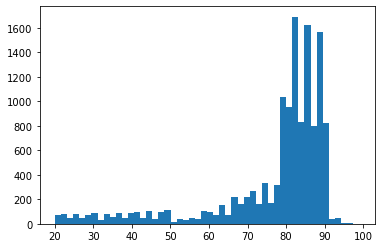

In [22]:
plt.hist(df3["Rating"], bins=50)


(array([7.998e+03, 2.259e+03, 1.384e+03, 7.970e+02, 5.190e+02, 3.240e+02,
        3.000e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

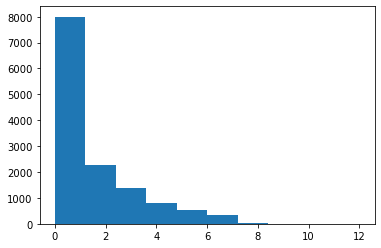

In [23]:
plt.hist(df3["WhereToBuy"], bins=10)


At first we leraned with the box plot that Average Play Time had outliers in the data so we decided to limit the Average Play Time data with hours only less then 200 

From our presonal knowladge we belived that there are not any games with more then 200 hours of Average play time

C:\Users\shahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Play Time'>

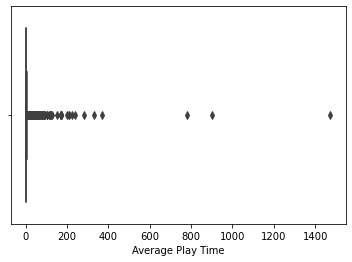

In [24]:
sns.boxplot(df3["Average Play Time"])


C:\Users\shahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Play Time'>

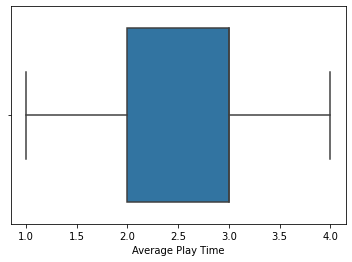

In [25]:
sns.boxplot(df3["Average Play Time"],showfliers=False)



In [26]:
df3["Average Play Time"].describe()

count    13317.000000
mean         4.101299
std         18.996131
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max       1473.000000
Name: Average Play Time, dtype: float64

<ipython-input-27-1389b11da73b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Average Play Time"][df3["Average Play Time"]>200] = df3["Average Play Time"].mean()
C:\Users\shahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Play Time'>

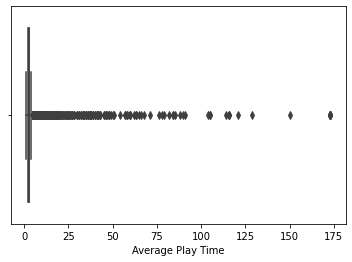

In [27]:
df3["Average Play Time"][df3["Average Play Time"]>200] = df3["Average Play Time"].mean()
sns.boxplot(df3["Average Play Time"])

Most of the games had only one or two Places to buy but some of them had 12+ places so we decided to make the data more unifed

C:\Users\shahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WhereToBuy'>

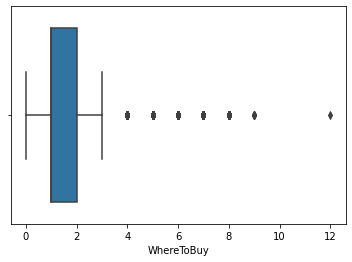

In [28]:
sns.boxplot(df3["WhereToBuy"])


In [29]:
df3["WhereToBuy"].median()

1.0

<ipython-input-30-0e34b300c2a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["WhereToBuy"][df3["WhereToBuy"]>4] = df3["WhereToBuy"].median()
C:\Users\shahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WhereToBuy'>

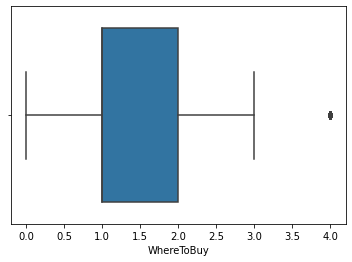

In [30]:
df3["WhereToBuy"][df3["WhereToBuy"]>4] = df3["WhereToBuy"].median()
sns.boxplot(df3["WhereToBuy"])

In [31]:
df3["WhereToBuy"].describe()

count    13317.000000
mean         1.389202
std          1.067902
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: WhereToBuy, dtype: float64

Text(0.5, 1.0, 'How Many Places To Buy')

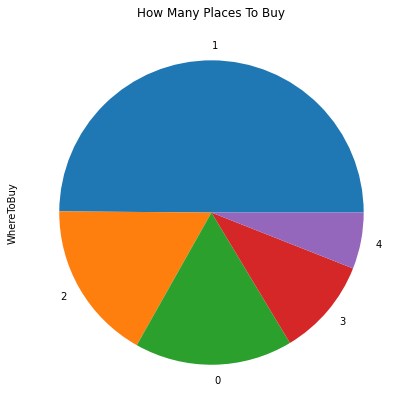

In [32]:
#data
#bar plot
fig=plt.figure(figsize=(7,7))
df3["WhereToBuy"].value_counts().plot(kind='pie')
plt.title("How Many Places To Buy")

Text(0.5, 0, 'Rating')

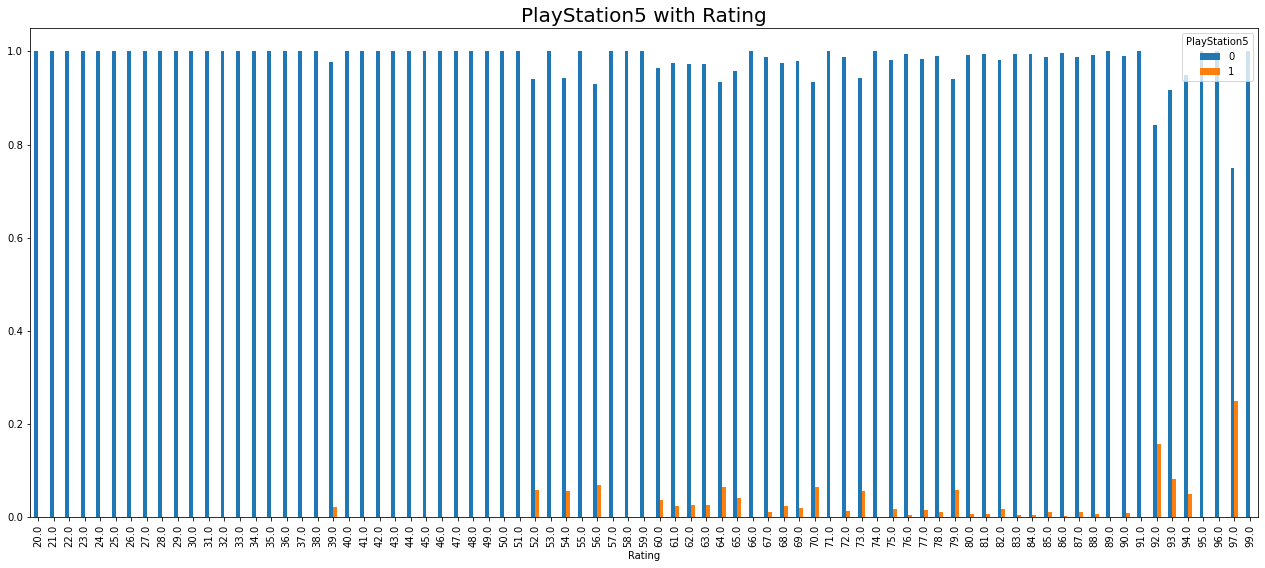

In [33]:
ct2 = pd.crosstab(df3["Rating"],df3["PlayStation5"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("PlayStation5 with Rating",fontsize=20)
plt.xlabel("Rating")


Text(0.5, 0, 'Rating')

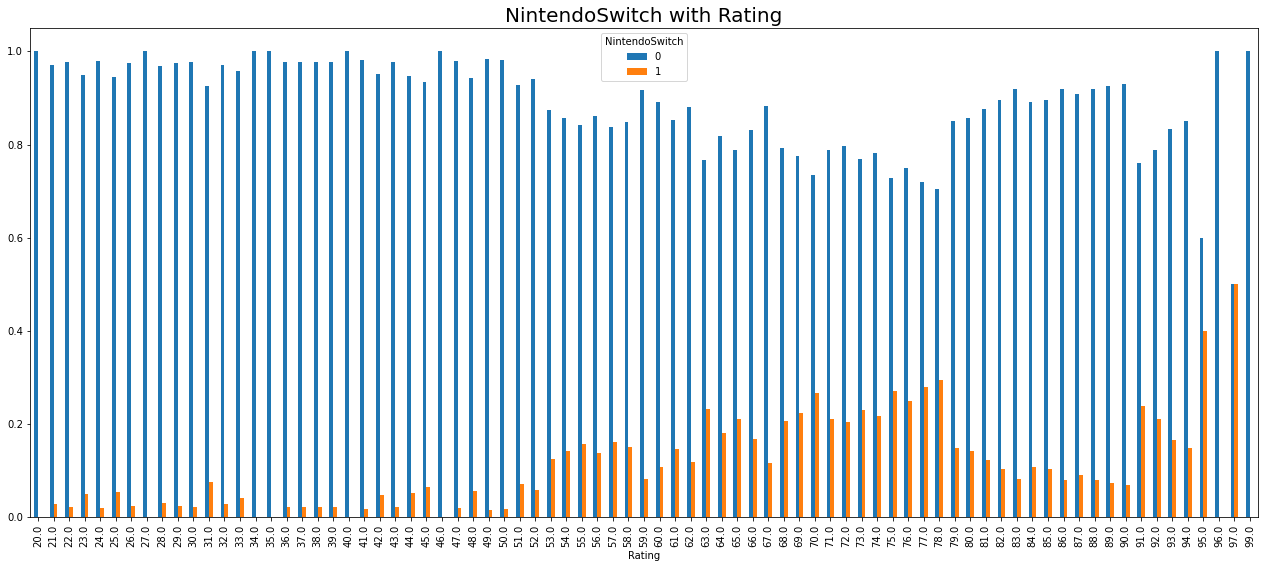

In [34]:
ct2 = pd.crosstab(df3["Rating"],df3["NintendoSwitch"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("NintendoSwitch with Rating",fontsize=20)
plt.xlabel("Rating")


Text(0.5, 0, 'Rating')

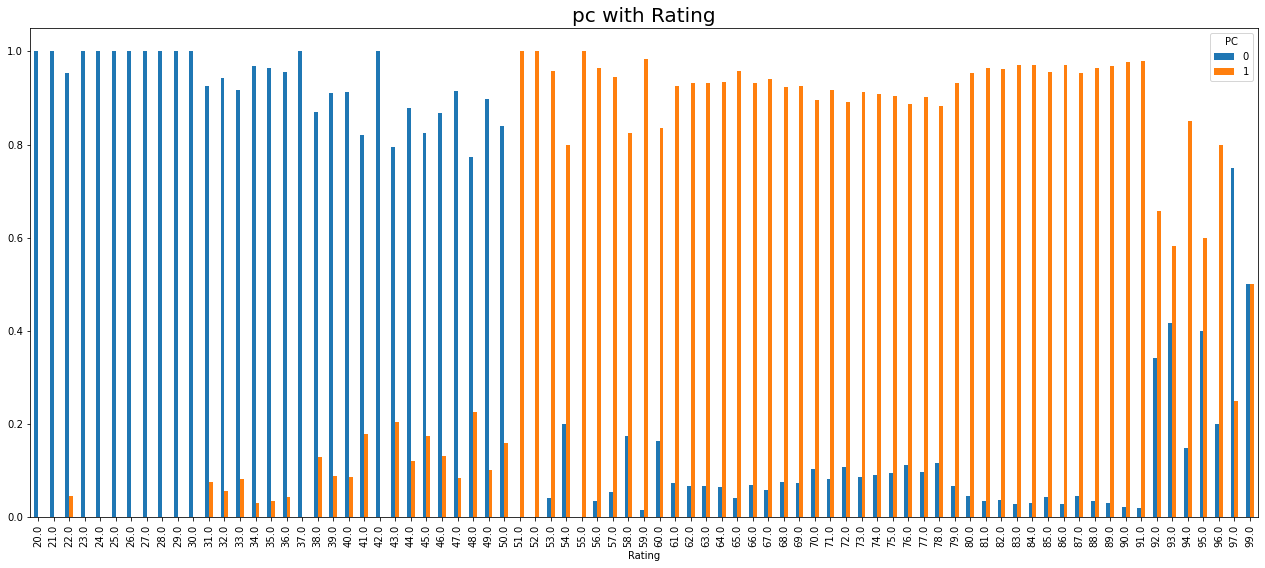

In [35]:
ct2 = pd.crosstab(df3["Rating"],df3["PC"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("pc with Rating",fontsize=20)
plt.xlabel("Rating")


Text(0.5, 0, 'Rating')

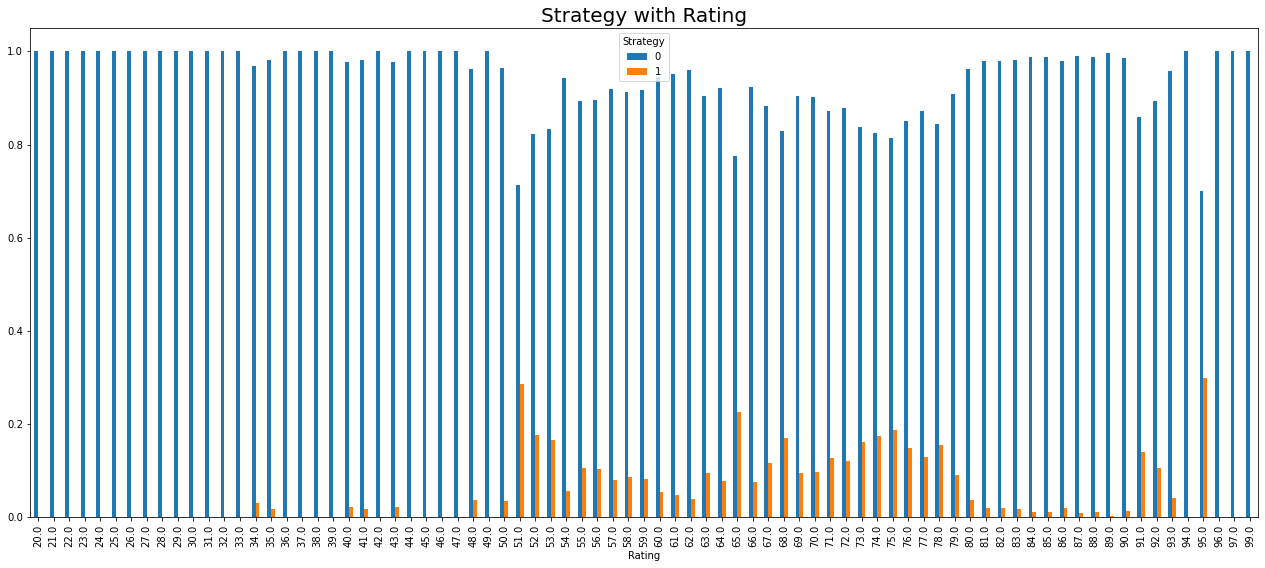

In [36]:
ct2 = pd.crosstab(df3["Rating"],df3["Strategy"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("Strategy with Rating",fontsize=20)
plt.xlabel("Rating")


Text(0.5, 0, 'Rating')

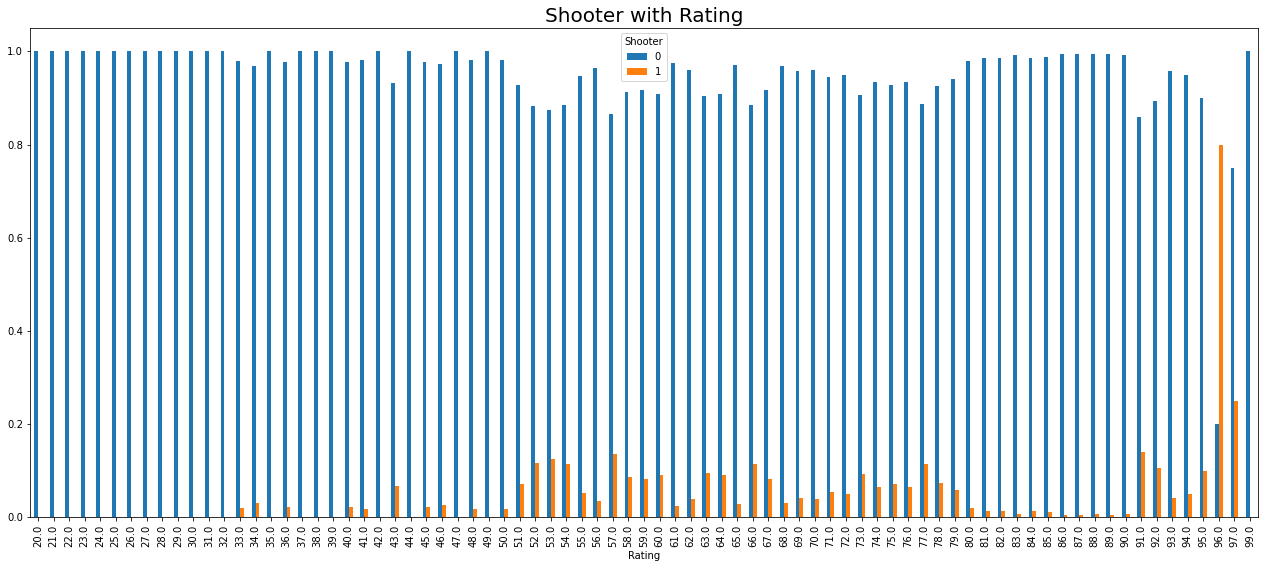

In [37]:
ct2 = pd.crosstab(df3["Rating"],df3["Shooter"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("Shooter with Rating",fontsize=20)
plt.xlabel("Rating")


Text(0.5, 0, 'Rating')

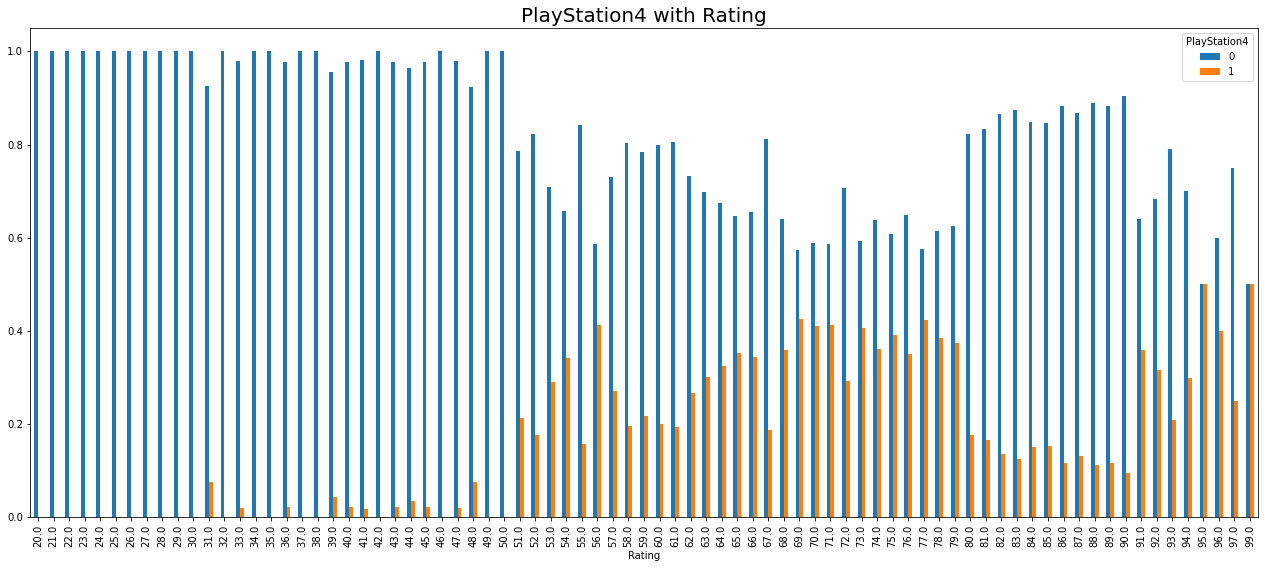

In [38]:
ct2 = pd.crosstab(df3["Rating"],df3["PlayStation4"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("PlayStation4 with Rating",fontsize=20)
plt.xlabel("Rating")


Text(0.5, 0, 'Rating')

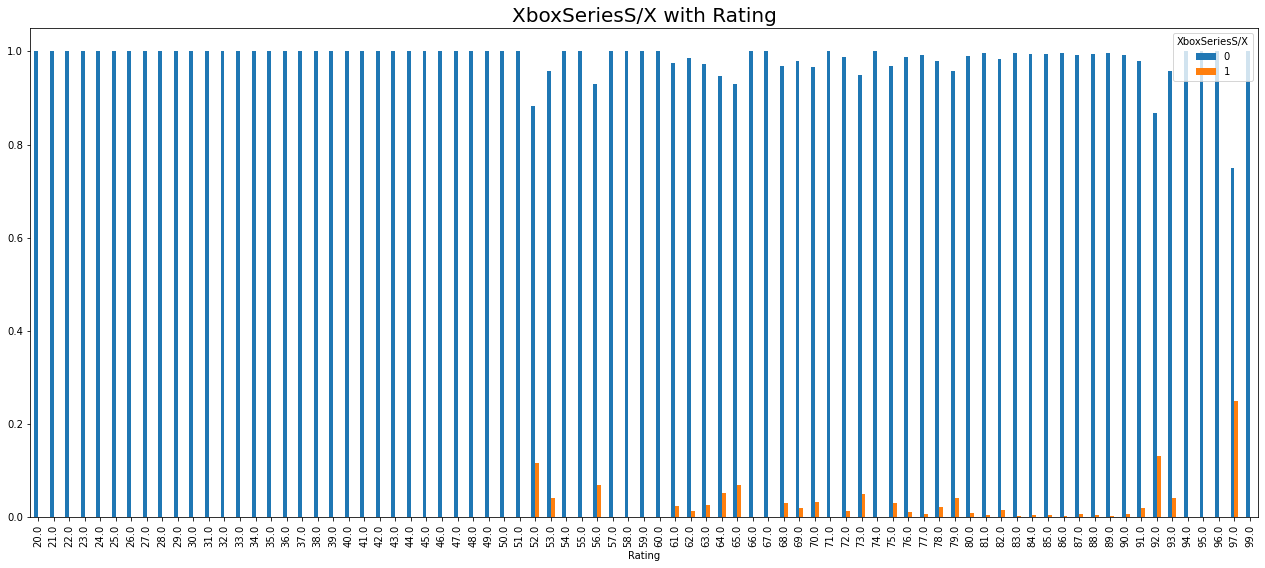

In [39]:
ct2 = pd.crosstab(df3["Rating"],df3["XboxSeriesS/X"],normalize='index')
ct2.plot(kind='bar',figsize=(22,9))
plt.title("XboxSeriesS/X with Rating",fontsize=20)
plt.xlabel("Rating")


<AxesSubplot:>

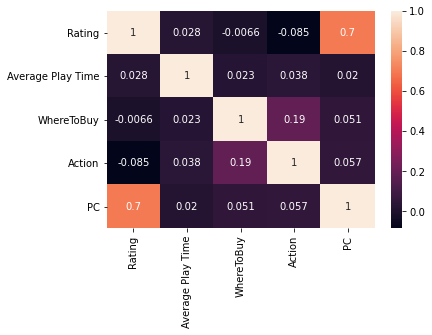

In [40]:
df4 = pd.DataFrame(df3, columns = ['Rating', 'Average Play Time', 'WhereToBuy', 'Action', 'PC'])
sns.heatmap(df4.corr(), annot=True)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13317 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13317 non-null  object 
 1   Rating             13317 non-null  float64
 2   WhereToBuy         13317 non-null  int64  
 3   Average Play Time  13317 non-null  float64
 4   Action             13317 non-null  uint8  
 5   Adventure          13317 non-null  uint8  
 6   Indie              13317 non-null  uint8  
 7   RPG                13317 non-null  uint8  
 8   Shooter            13317 non-null  uint8  
 9   Strategy           13317 non-null  uint8  
 10  PlayStation4       13317 non-null  uint8  
 11  PC                 13317 non-null  uint8  
 12  XboxOne            13317 non-null  uint8  
 13  PlayStation5       13317 non-null  uint8  
 14  NintendoSwitch     13317 non-null  uint8  
 15  XboxSeriesS/X      13317 non-null  uint8  
dtypes: float64(2), int64(1

In [42]:

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
X=df3.drop(["Name","Rating"],axis=1)
y=df3["Rating"]


In [43]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13317 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WhereToBuy         13317 non-null  int64  
 1   Average Play Time  13317 non-null  float64
 2   Action             13317 non-null  uint8  
 3   Adventure          13317 non-null  uint8  
 4   Indie              13317 non-null  uint8  
 5   RPG                13317 non-null  uint8  
 6   Shooter            13317 non-null  uint8  
 7   Strategy           13317 non-null  uint8  
 8   PlayStation4       13317 non-null  uint8  
 9   PC                 13317 non-null  uint8  
 10  XboxOne            13317 non-null  uint8  
 11  PlayStation5       13317 non-null  uint8  
 12  NintendoSwitch     13317 non-null  uint8  
 13  XboxSeriesS/X      13317 non-null  uint8  
dtypes: float64(1), int64(1), uint8(12)
memory usage: 468.2 KB


In [44]:
X

,WhereToBuy,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy,PlayStation4,PC,XboxOne,PlayStation5,NintendoSwitch,XboxSeriesS/X
0,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1.0,1,1,0,0,1,1,1,1,0,1,0,0
2,2,3.0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,1.0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,5.0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,3,1.0,0,0,0,0,0,0,0,1,0,0,0,0
13576,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0
13577,3,4.0,0,0,0,0,0,0,0,1,0,0,0,0
13578,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0


<b>Machine Learning 

Our quesion was whether we can predicte the game rating according to the game data
<br>At first we did Linear Regression but we noticed our results were not good enough<br>
<br>So we decided to use Auto skrealen the finds the best ML for our data by iteslf<br>

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

In [46]:
ytrain.isnull().sum()

0

In [47]:
df3.describe()

,Rating,WhereToBuy,Average Play Time,Action,Adventure,Indie,RPG,Shooter,Strategy,PlayStation4,PC,XboxOne,PlayStation5,NintendoSwitch,XboxSeriesS/X
count,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000
mean,76.838778,1.389202,3.713157,0.145603,0.090110,0.088308,0.099797,0.023429,0.038447,0.166629,0.860029,0.141999,0.010963,0.113164,0.009086
std,15.969004,1.067902,7.260781,0.352721,0.286351,0.283753,0.299741,0.151266,0.192280,0.372658,0.346970,0.349062,0.104135,0.316805,0.094891
min,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,82.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,86.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,4.000000,173.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:

reg=LinearRegression(fit_intercept=True,normalize=True)
reg.fit(xtrain,ytrain)
y_pred=reg.predict(xtest)
print(f"mse: {metrics.mean_squared_error(ytest,y_pred)}")
print(f"r^2: {metrics.r2_score(ytest,y_pred)}")

mse: 120.43365275184071
r^2: 0.5287999085878171


In [49]:
for k, v in sorted(dict(zip(X.columns, abs(reg.coef_))).items(), key = lambda x:x[1], reverse = True):
  print(k,v)

PC 32.95992760902812
Indie 7.062134419711049
PlayStation4 4.741054480193307
PlayStation5 3.9645850142986716
XboxSeriesS/X 3.7855366120025487
XboxOne 3.3775408228112167
Action 2.8710524251580196
NintendoSwitch 1.8664967267700454
Shooter 1.7917729217924192
Strategy 1.3853973099006378
Adventure 1.2848742830347792
RPG 0.6410920617481024
WhereToBuy 0.3098658353050342
Average Play Time 0.04853686066088626
